In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy.optimize as opt

In [8]:
path = './data/exam_data.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Pass'])
data.head()
data.shape


(100, 3)

In [36]:
training = data[:80]
test = data[80:]
training

,Exam 1,Exam 2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
75,99.827858,72.369252,1
76,47.264269,88.475865,1
77,50.458160,75.809860,1
78,60.455556,42.508409,0


Text(0, 0.5, 'Exam 2 Score')

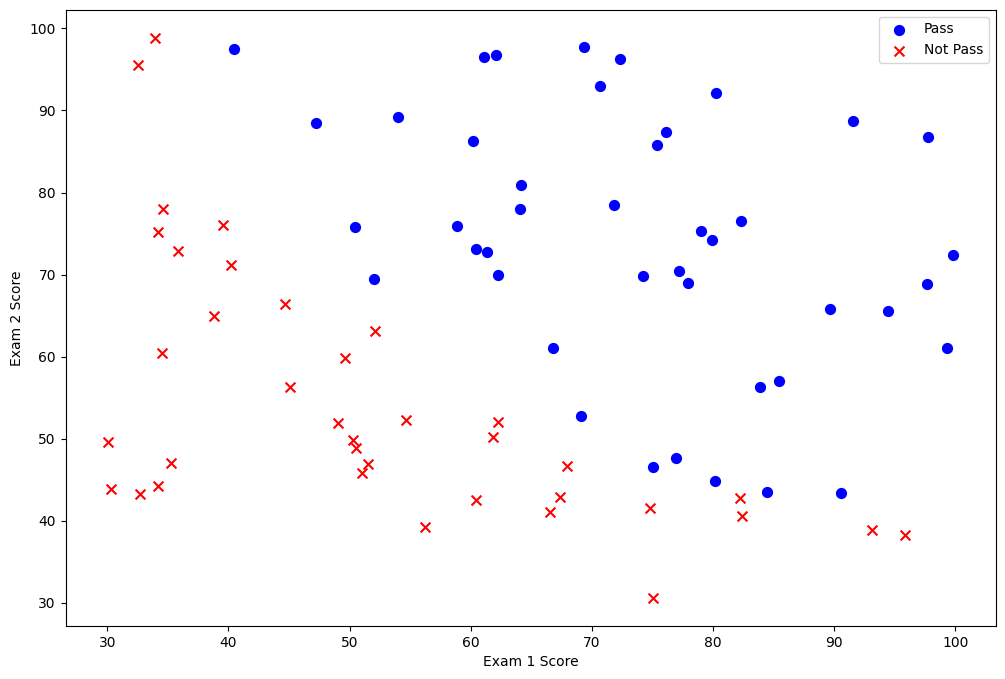

In [15]:
positive = training[training['Pass'].isin([1])]
negative = training[training['Pass'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Pass')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Pass')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [37]:
# add an additional column of ones to simplify the matrix multiplication
training.insert(0, 'Ones', 1)
test.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols_training = training.shape[1]
cols_test = test.shape[1]
X_training = training.iloc[:,0:cols_training-1]
X_test = training.iloc[:,0:cols_test-1]
y_training = training.iloc[:,cols_training-1:cols_training]
y_test = training.iloc[:,cols_test-1:cols_test]

# convert to numpy arrays and initalize the parameter array theta
X_training = np.array(X_training.values)
X_test = np.array(X_test.values)
y_training = np.array(y_training.values)
y_test = np.array(y_test.values)
theta = np.zeros(3)

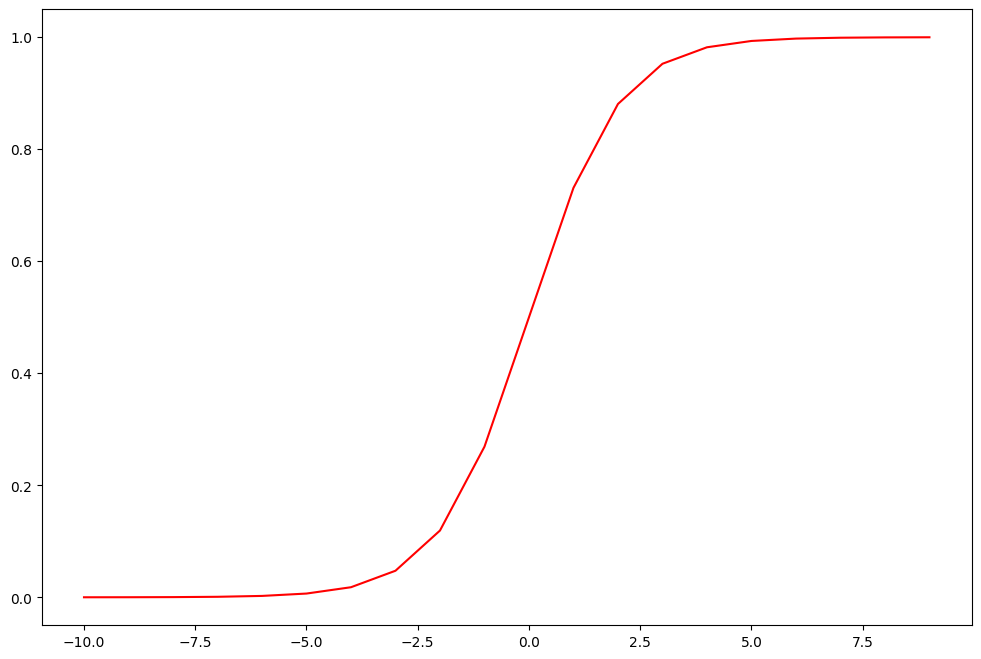

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [ ]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [ ]:
X_training.shape, theta.shape, y_training.shape

((80, 3), (3,), (80, 1))

In [ ]:
cost(theta, X_training, y_training)

0.6931471805599453

In [ ]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [ ]:
gradient(theta, X_training, y_training)

array([-0.0375    , -7.72769376, -7.30582918])

In [ ]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X_training, y_training))
result

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   1.13093797E+02
    1    3  6.665726209300359E-01   1.68711281E-01
    2    7  4.406421380263558E-01   1.05884535E+02
    3    9  3.659324394959714E-01   9.00957021E+00
    4   11  3.472460456939282E-01   3.48838604E+01
    5   13  2.543037894756153E-01   1.79626380E+01
    6   15  2.443025084651427E-01   2.50567029E-01
    7   17  2.410974505063349E-01   8.11190092E-02
    8   19  2.410401675809505E-01   1.55164327E-02
tnc: stepmx = 1000
    9   22  2.037661513219133E-01   3.27484944E-02
   10   24  2.035580618756362E-01   4.46818177E-04
tnc: fscale = 47.308
   11   26  2.035572485327533E-01   3.64558937E-04
   12   28  2.033070386890586E-01   2.13432399E-02
   13   30  2.026138216036115E-01   1.43134694E-02
   14   32  2.025918885082862E-01   3.84761269E-03
   15   34  2.025772637205404E-01   1.18537080E-03
   16   36  2.025627430380656E-01   4.08425667E-03
   17   38  2.025560587246224E-01   2.96388236E-08
t

(array([-26.03352113,   0.21132851,   0.20518625]), 40, 1)

In [ ]:
cost(result[0], X_training, y_training)

0.20255605869396787

In [ ]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [38]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X_test)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y_test)]
accuracy = (sum(map(int, correct)) % len(correct))
print(f'accuracy = {accuracy}%')

accuracy = 71%
